In [1]:
# dependancies and setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import datetime
import calendar

---
# Breach Data
---

### Pull and format data for analysis

In [2]:
# import csv
cyber_data = pd.read_csv('source_data/cyber_data_clean.csv')
cyber_data.head()

,Unnamed: 0,Breach ID,State,Year,Full Date
0,1054,725,TX,2012,2012-12-27
1,1053,438,CA,2011,2011-12-22
2,1052,818,MO,2009,2009-12-21
3,1050,676,MA,2012,2012-12-15
4,1049,638,CA,2012,2012-12-10


In [3]:
# drop unneeded column
cyber_data = cyber_data.drop(['Unnamed: 0'], axis=1)

# add month column
cyber_data['Month'] = pd.DatetimeIndex(cyber_data['Full Date']).month
cyber_data['Month'] = cyber_data['Month'].apply(lambda x: calendar.month_abbr[x])
cyber_data.head()

,Breach ID,State,Year,Full Date,Month
0,725,TX,2012,2012-12-27,Dec
1,438,CA,2011,2011-12-22,Dec
2,818,MO,2009,2009-12-21,Dec
3,676,MA,2012,2012-12-15,Dec
4,638,CA,2012,2012-12-10,Dec


---
### Get a sense of the data by running inital analysis

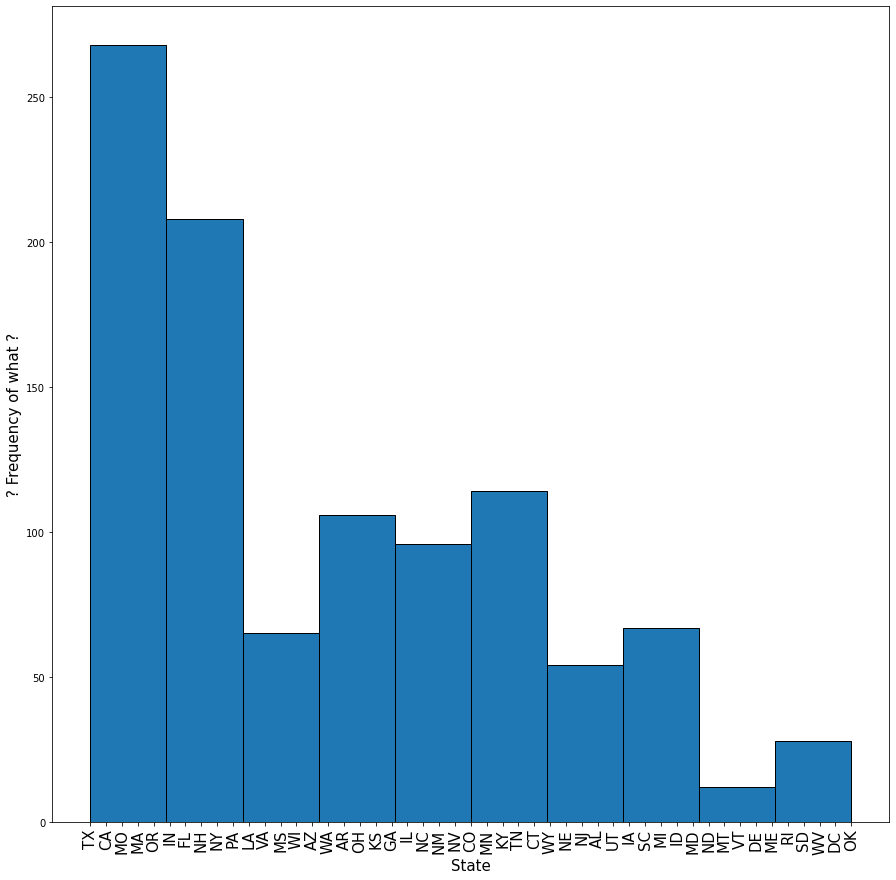

In [38]:
# look at overall data distribution
len_brch = len(cyber_data['State'])
plt.figure(figsize=(15,15))
plt.hist(cyber_data['State'], bins=10, edgecolor='black')
plt.xticks(rotation=90, size=15)
plt.xlabel('State', size=15)
plt.ylabel('? Frequency of what ?', size=15)
plt.show()
# looks very abnormal

In [39]:
cyber_data.describe()

,Breach ID,Year
count,1018.000000,1018.000000
mean,527.172888,2011.454813
std,303.984328,1.587321
min,0.000000,1997.000000
25%,263.250000,2010.000000
50%,532.500000,2012.000000
75%,787.750000,2013.000000
max,1054.000000,2014.000000


### Find the states with the most and least data breaches

In [ ]:
# group data and count breach occurances
# sort values so that the max is at the top and min is last
top_breach_states = pd.DataFrame(cyber_data.groupby(['State'])['Breach ID'].count().sort_values(ascending=False))

# use describe to identify min/max values for boolean then convert to int
st_breach_max = int(top_breach_states.describe().max()) 
st_breach_min = int(top_breach_states.describe().min())

#isolate the min state
top_breach_states[top_breach_states['Breach ID']==st_breach_min]
# isolate the max state
top_breach_states[top_breach_states['Breach ID']==st_breach_max]

## BARCHART OF STATES & BRAECH COUNT

### Look for trends over the years

In [51]:
# group data by year & State to define datat for plot over time
# state_yr_breach = cyber_data.groupby(['Year','State'])['Breach ID'].count().sort_values()
# state_yr_breach = pd.DataFrame(state_yr_breach.reset_index())
# state_yr_breach.columns = ['Year', 'State', 'Breach Count']
# state_yr_breach.head()

# DF of breach counts by YR
cyber_data['Year'].sort_values(ascending=False)
yr_breach_count = pd.DataFrame(cyber_data.groupby(['Year','Month'])['Breach ID'].count())                              
yr_breach_count = yr_breach_count.rename(columns={'Breach ID': 'Breach Count'}) 
yr_breach_count.reset_index().sort_values('Breach Count',ascending=False).head()

,Year,Month,Breach Count
66,2013,Mar,25
55,2012,May,24
46,2011,Sep,24
69,2013,Oct,24
57,2012,Oct,24


# BARCHART CHART HERE YEAR AND BREACH COUNT

In [43]:
# get quartiles of Breach count per year
# (q1,q2,q3) = yr_breach_count['Breach Count'].quantile([.25, .5, .75])
# find upper and lower bounds
# mean =  yr_breach_count['Breach Count'].mean()
# iqr = q3 - q1
# low_bound = q1 - (1.5*iqr)
# upr_bound = q3 + (1.5*iqr)

---

## Isolate data to most occurances of data breaches

In [45]:
# pull only the data points that are in tX & CA
tx_breaches = cyber_data.loc[(cyber_data['State']=='TX')]['Breach ID']
ca_breaches = cyber_data.loc[(cyber_data['State']=='CA')]['Breach ID']

# BOX PLOT HERE TX & CA 

----
# **Fire Data** 

---
### Pull and format data for analysis

In [24]:
# pull in fire data from API results
firedf = pd.read_csv('source_data/disaster_data.csv')
firedf.head()

,Unnamed: 0,dis_id,date,state,type
0,1743,5f7b2c0831a8c6681cfd7421,2008-02-08,TX,Fire
1,1744,5f7b2c0831a8c6681cfd7423,2008-02-13,TX,Fire
2,1745,5f7b2c0831a8c6681cfd7426,2008-02-23,TX,Fire
3,1746,5f7b2c0831a8c6681cfd742a,2008-02-25,TX,Fire
4,1747,5f7b2c0831a8c6681cfd742e,2008-02-25,OK,Fire


In [25]:
# add month and yr columns
firedf['month'] = pd.DatetimeIndex(firedf['date']).month
firedf['year'] = pd.DatetimeIndex(firedf['date']).year
firedf.head()

,Unnamed: 0,dis_id,date,state,type,month,year
0,1743,5f7b2c0831a8c6681cfd7421,2008-02-08,TX,Fire,2,2008
1,1744,5f7b2c0831a8c6681cfd7423,2008-02-13,TX,Fire,2,2008
2,1745,5f7b2c0831a8c6681cfd7426,2008-02-23,TX,Fire,2,2008
3,1746,5f7b2c0831a8c6681cfd742a,2008-02-25,TX,Fire,2,2008
4,1747,5f7b2c0831a8c6681cfd742e,2008-02-25,OK,Fire,2,2008


In [26]:
# change month # to month name
firedf['month'] = firedf['month'].apply(lambda x: calendar.month_abbr[x])
firedf.head()

,Unnamed: 0,dis_id,date,state,type,month,year
0,1743,5f7b2c0831a8c6681cfd7421,2008-02-08,TX,Fire,Feb,2008
1,1744,5f7b2c0831a8c6681cfd7423,2008-02-13,TX,Fire,Feb,2008
2,1745,5f7b2c0831a8c6681cfd7426,2008-02-23,TX,Fire,Feb,2008
3,1746,5f7b2c0831a8c6681cfd742a,2008-02-25,TX,Fire,Feb,2008
4,1747,5f7b2c0831a8c6681cfd742e,2008-02-25,OK,Fire,Feb,2008


---
### Get a sense of the data by running inital analysis

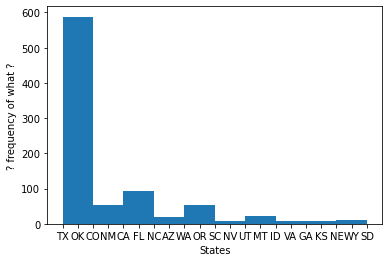

In [37]:
# look at overall data distribution
len_brch = len(firedf['state'])
plt.hist(firedf['state'], bins=10)
plt.xlabel('States')
plt.ylabel('? frequency of what ?')
plt.show()
# looks very abnormal

In [30]:
firedf.describe()

,Unnamed: 0,year
count,866.000000,866.000000
mean,2175.500000,2010.090069
std,250.136962,1.833211
min,1743.000000,2008.000000
25%,1959.250000,2008.000000
50%,2175.500000,2011.000000
75%,2391.750000,2011.000000
max,2608.000000,2014.000000


In [48]:
# DF of breach counts by YR
firedf['year'].sort_values(ascending=False)
yr_fire_count = pd.DataFrame(firedf.groupby(['year','month'])['dis_id'].count())                              
yr_fire_count = yr_fire_count.rename(columns={'dis_id': 'fire_count'}) 
yr_fire_count.reset_index().sort_values( 'fire_count',ascending=False).head()

,year,month,fire_count
5,2008,Mar,240
24,2011,Apr,168
25,2011,Aug,80
28,2011,Jun,32
4,2008,Jun,32


### Find the state with the most & least wildfires

In [32]:
# group data and count wildfire occurances
# sort values so that the max is at the top and min is last
st_fire_count = pd.DataFrame(firedf.groupby(['state'])['dis_id'].count().sort_values(ascending=False))
# use describe to identify min/max values for boolean then convert to int
st_fire_max = int(st_fire_count.describe().max()) 
st_fire_min = int(st_fire_count.describe().min())
st_fire_count.describe()

#isolate the min state
st_fire_count[st_fire_count['dis_id']==st_fire_min]
# isolate the max state
st_fire_count[st_fire_count['dis_id']==st_fire_max]

## BARCHART OF STATES & BRAECH COUNT

### Look for trends over the years

In [53]:
# group data by year & State to define datat for plot over time
# state_yr_breach = cyber_data.groupby(['Year','State'])['Breach ID'].count().sort_values()
# state_yr_breach = pd.DataFrame(state_yr_breach.reset_index())
# state_yr_breach.columns = ['Year', 'State', 'Breach Count']
# state_yr_breach.head()

# DF of breach counts by YR
firedf['year'].sort_values(ascending=False)
yr_fire_count = pd.DataFrame(firedf.groupby(['year','month'])['dis_id'].count())                              
yr_fire_count = yr_fire_count.rename(columns={'dis_id': 'Fire Count'}) 
yr_fire_count.reset_index().sort_values('Fire Count',ascending=False).head()

,year,month,Fire Count
5,2008,Mar,240
24,2011,Apr,168
25,2011,Aug,80
28,2011,Jun,32
4,2008,Jun,32


# BARCHART CHART HERE YEAR AND BREACH COUNT

In [ ]:
# get quartiles of Breach count per year
# (q1,q2,q3) = yr_breach_count['Breach Count'].quantile([.25, .5, .75])
# find upper and lower bounds
# mean =  yr_breach_count['Breach Count'].mean()
# iqr = q3 - q1
# low_bound = q1 - (1.5*iqr)
# upr_bound = q3 + (1.5*iqr)

----
## Isolate data to most occurances of data breaches

In [44]:
# pull only the data points that are in tX & CA
tx_fires = firedf.loc[(firedf['state']=='TX')]['dis_id']
ca_fires = firedf.loc[(firedf['state']=='CA')]['dis_id']

# BOX PLOT HERE TX & CA 

----
# COMBINED ANALYSIS
----

## State fires v State breaches
* Scatter Plot

## TX Fires v. TX Breaches
* Scatter Plot

## CA Fires v. CA Breaches
* Scatter Plot

## YR Fires v. YR Breaches
* Line chart w/ both data sets